<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Первичный-осмотр-данных" data-toc-modified-id="Первичный-осмотр-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Первичный осмотр данных</a></span></li><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Преобразование данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#График-за-неделю" data-toc-modified-id="График-за-неделю-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>График за неделю</a></span></li><li><span><a href="#График-за-2-месяца" data-toc-modified-id="График-за-2-месяца-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>График за 2 месяца</a></span></li><li><span><a href="#График-за-все-время" data-toc-modified-id="График-за-все-время-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>График за все время</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разбиваем-на-выборки" data-toc-modified-id="Разбиваем-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разбиваем на выборки</a></span></li><li><span><a href="#Функции-подбора-параметров" data-toc-modified-id="Функции-подбора-параметров-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функции подбора параметров</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RidgeCV" data-toc-modified-id="RidgeCV-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RidgeCV</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#Факт-/-предсказание" data-toc-modified-id="Факт-/-предсказание-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факт / предсказание</a></span></li><li><span><a href="#Предсказание-заказов-на-следующий-час" data-toc-modified-id="Предсказание-заказов-на-следующий-час-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Предсказание заказов на следующий час</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. 

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV

from lightgbm import LGBMRegressor

import seaborn as sns
sns.set_style('white')

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.4f}'.format

## Подготовка

### Первичный осмотр данных

In [2]:
data = pd.read_csv(r'/datasets/taxi.csv')

In [3]:
data.head(3)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [5]:
data.describe(include='all')

,datetime,num_orders
count,26496,"26,496.0000"
unique,26496,NaN
top,2018-07-28 03:50:00,NaN
freq,1,NaN
mean,NaN,14.0705
std,NaN,9.2113
min,NaN,0.0000
25%,NaN,8.0000
50%,NaN,13.0000
75%,NaN,19.0000


In [6]:
pd.DataFrame(
    [round((data.isna().mean()*100),2), data.isna().sum()]).T \
    .rename(columns={0: 'percent_na', 1: 'count_na'}) \
    .sort_values(by='count_na', ascending=False) \
    .style.background_gradient('coolwarm')

,percent_na,count_na
datetime,0.000000,0.000000
num_orders,0.000000,0.000000


<div style="border:solid green 2.0px; padding: 10px"> 

Данные сожержат количество дату с гранулярностью в 10 мин и суммарное количество заказов за этот промежуток времени.

Пропусков нет
<div>

### Преобразование данных

<div style="border:solid green 2.0px; padding: 10px"> 

 - назначим дату индексом
 - отсортируем по данные по времени для корректного обучения моделей   
 - ресемплируем данные до одного часа, просуммировав количество заказов в каждом часу
    
Пропусков нет
<div>

In [7]:
data['datetime'] = data['datetime'].astype('datetime64')

In [8]:
data = data.set_index('datetime')
data.sort_index(inplace=True)
data.index.is_monotonic

True

In [9]:
data = data.resample('1H').sum()

In [10]:
data.index.is_monotonic

True

## Анализ

<div style="border:solid green 2.0px; padding: 10px"> 

Напишем функцию, **graph_time_series** которая 
 -  принимает на вход временной ряд и ширину окна:
 -  возвращает график, на котором:
   -  временной ряд разложен на тренд, сезонность и остатки
   -  добавлены скользящее среднее и стандартное отклонение
    
<div>

In [11]:
def graph_time_series(df, date_min, date_max, rolling_size):
    data = df[date_min: date_max]
    decomposed = seasonal_decompose(data)
    mean_data = data.rolling(rolling_size).mean().squeeze()
    std_data = data.rolling(rolling_size).std().squeeze()
    
    fig, axes = plt.subplots(5, 1, figsize=(18, 10), sharex=True)
    ax1 = sns.lineplot(data=decomposed.trend,       label='Тренд',                  color = 'green',  ax=axes[0])
    ax2 = sns.lineplot(data=decomposed.seasonal,    label='Сезонность',             color = 'blue',   ax=axes[1])
    ax3 = sns.lineplot(data=decomposed.resid,       label='Остатки',                color = 'red',    ax=axes[2])
    ax4 = sns.lineplot(data=mean_data,              label='Среднее',                color = 'orange', ax=axes[3])
    ax5 = sns.lineplot(data=std_data,               label='Стандартное отклонение', color = 'gray',   ax=axes[4])
    
    fig.suptitle(f'Разложение временного ряда: динамика количества поездок', fontsize=20)
    ax1.set(ylabel = 'Количество')
    ax2.set(ylabel = 'Количество')
    ax3.set(ylabel = 'Количество')
    ax4.set(ylabel = 'Количество')
    ax5.set(ylabel = 'Количество')
    plt.xlabel('Дата', fontsize=14)

### График за неделю

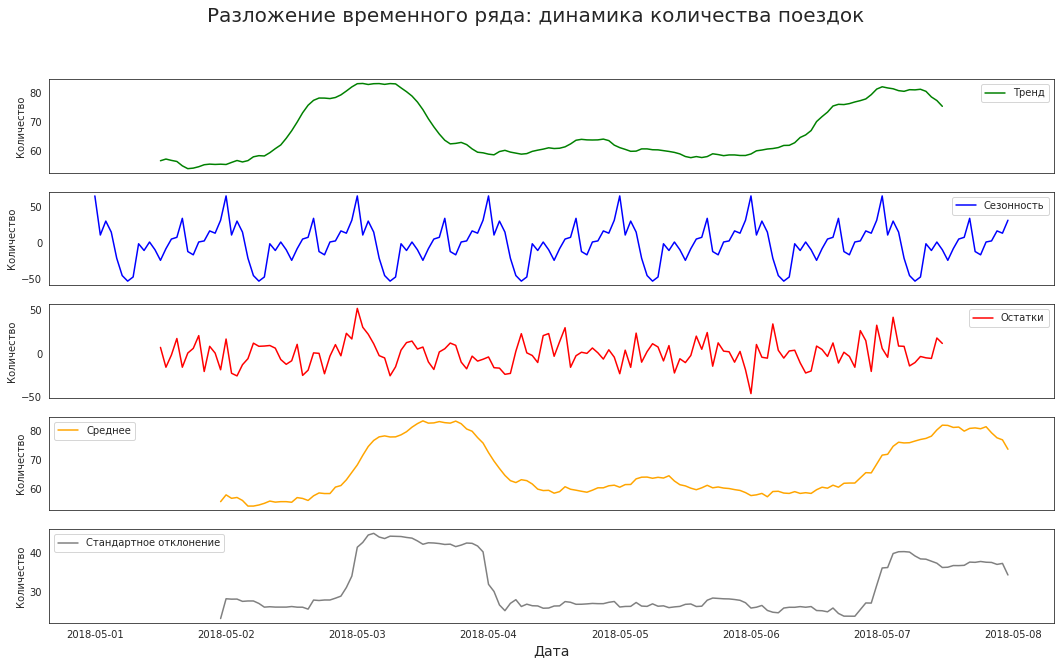

In [12]:
graph_time_series(data, '05-01-2018', '05-07-2018', 24)

### График за 2 месяца

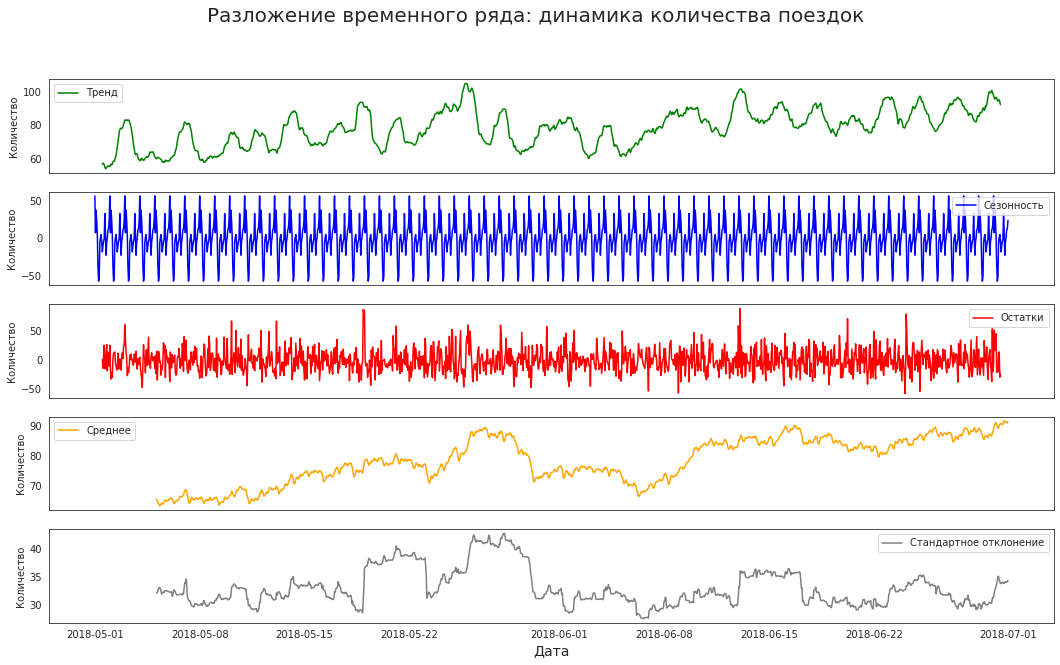

In [13]:
graph_time_series(data, '05-01-2018', '06-30-2018', 100)

### График за все время

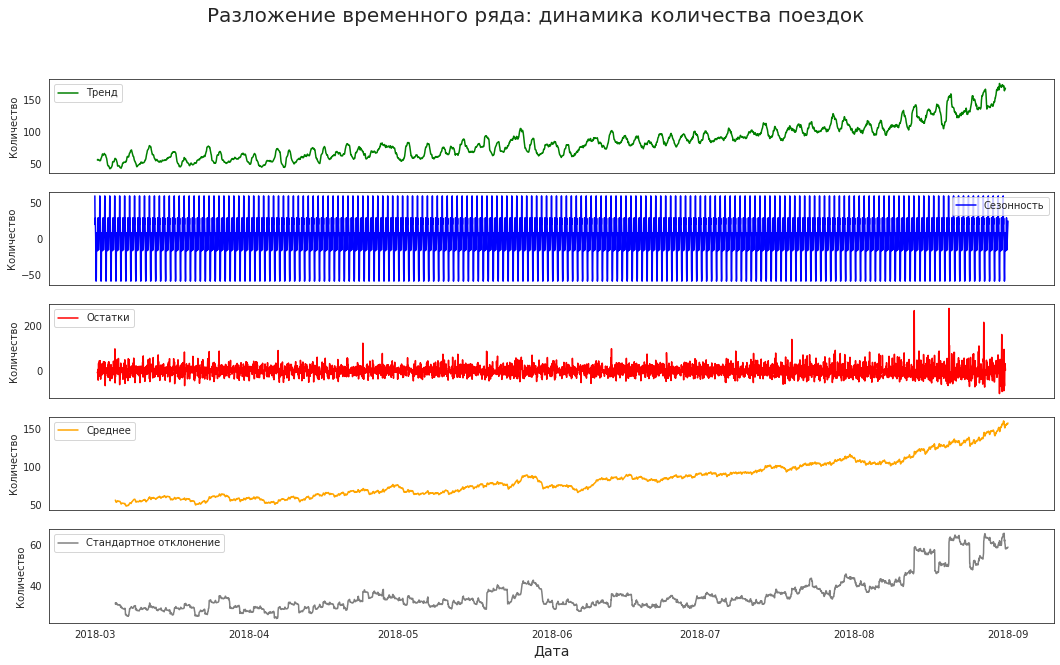

In [14]:
graph_time_series(data, '03-01-2018', '08-31-2018', 100)

### Вывод

<div style="border:solid green 2.0px; padding: 10px"> 

Мы видим:
- тренд. имеет две составляющие:
    - колебания поездок в разные дни недели: в выходные и праздники количество поездок больше
    - общий восходящий тренд от месяца к месяцу количества поездок. это подтверждает увеличивающееся среднее. возможно есть фактор сезонности  времени года, но данных у нас мало, чтобы это утверждать
- сезонность. в данном случае сезонностью выступают колебания количества поездок в течение дня: вечером видим пики активности, глубокой ночью спады
 - остатки. необъясненная трендами и сезонностью дисперсия
    
    
<div>

## Обучение

### Разбиваем на выборки

<div style="border:solid green 2.0px; padding: 10px"> 

Отделим от данных тестовую выборку, составляющую 10 процентов от всей, и отложим ее в сторону.
Все остальное потом будем делить на обучающую и валидационную
    
<div>

In [18]:
data_notest, data_test = train_test_split(data, test_size=0.1, random_state=12345, shuffle=False)

print(f'Размер исходной выборки: {data.shape}')
print(f'Размер обучающей+валидационной выборки: {data_notest.shape}')
print(f'Размер тестовой выборки: {data_test.shape}')

Размер исходной выборки: (4416, 1)
Размер обучающей+валидационной выборки: (3974, 1)
Размер тестовой выборки: (442, 1)


<div style="border:solid green 2.0px; padding: 10px"> 

Функция **make_features_and_split**:
 - вычисляет новые фичи в зависимости от переданных параметров: 
   - max_lag: максимальный размер отставания 
   - rolling_mean_size: ширина окна
    
 - делит выборку на трейн и тест

    
Она нам будет полезна при автоматическом подборе оптимального отставания и ширины окна
<div>

In [73]:
def make_features_and_split(df, max_lag, rolling_mean_size, test_size=0.2):
    data = df.copy()
    #преобразуем ряд в стационарный
    #data = (data-data.shift()).dropna()
    
    #добавляем день, месяц, год, день недели
    #data['year'] = data.index.year
    #data['month'] = data.index.month
    #data['day'] = data.index.day
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    #добавляем переменные с отстающими значениями
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    #добавляем скользящее среднее
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    #делим на тренировочную и валидационную выборки
    train, valid = train_test_split(data, shuffle=False, test_size=test_size)
    train = train.dropna()
    
    features_train = train.drop('num_orders', axis=1)
    features_valid = valid.drop('num_orders', axis=1)
    target_train = train['num_orders']
    target_valid = valid['num_orders']
    
    return features_train, target_train, features_valid, target_valid

### Функции подбора параметров

<div style="border:solid green 2.0px; padding: 10px"> 

Функции **timeline_find_parametrs и timeline_find_parametrs_grid** служат для автоматического подбора оптимального размера отставания и ширины окна. Мы в цикле перебираем эти параметры, в зависимости от них на вход модели или эстиматору подаются разные датафреймы, на которых модель обучается. 

Возвращают датафрейм с оптимальными сочетаниями гиперпараметров модели (если применимо), размера отставания и ширины окна
    
Функция **timeline_find_parametrs** предназначена для моделей, в которых мы не перебираем гиперпараметры
    
Функция **timeline_find_parametrs_grid** предназначена для моделей, в которых мы перебираем гиперпараметры
    
<div>

In [20]:
def timeline_find_parametrs (df, model_type, range_max_lag, range_rolling_mean_size):
    
    # Датафрейм, который будет хранить результаты моделей
    results = pd.DataFrame(columns=['model', 'max_lag', 'rolling_mean_size', 'rmse'])
    model = model_type()

    # Перебираем отставания
    for max_lag in range_max_lag:

        # Перебираем ширину окна
        for rolling_mean_size in range_rolling_mean_size:

            # Добавляем фичи и делим на трейн и тест
            features_train, target_train, features_valid, target_valid = make_features_and_split(df, max_lag, rolling_mean_size)

            # Обучаем
            model.fit(features_train, target_train)
            
            # Предсказываем
            predict_valid = model.predict(features_valid)  

            # Считаем RMSE
            rmse_model = mean_squared_error(target_valid, predict_valid)**0.5
            results.loc[len(results)] = [model, max_lag, rolling_mean_size, rmse_model]
    return results
        
    

In [21]:
def timeline_find_parametrs_grid(df, model_type, param, range_max_lag, range_rolling_mean_size):
    
    # Датафрейм, который будет хранить результаты моделей
    results = pd.DataFrame(columns=['model', 'max_lag', 'rolling_mean_size', 'rmse'])

    searcher = GridSearchCV(model_type(), param_grid = param, scoring=rmse_scorer, cv=TimeSeriesSplit(n_splits=5))
    
    # Перебираем отставания
    for max_lag in range_max_lag:

        # Перебираем ширину окна
        for rolling_mean_size in range_rolling_mean_size:
            print(max_lag, rolling_mean_size)
            
            # Добавляем фичи и делим на трейн и тест
            features_train, target_train, features_valid, target_valid = make_features_and_split(df, max_lag, rolling_mean_size)
            
            # Получаем оптимальные гиперпараметры
            searcher.fit(features_train, target_train)
            
            # Обучаемся на оптимальных гиперпараметрах
            model = model_type(**searcher.best_params_)
            model.fit(features_train, target_train)

            # Предсказываем
            predict_valid = model.predict(features_valid)  
            
            # Считаем RMSE            
            rmse_model = mean_squared_error(target_valid, predict_valid)**0.5
            results.loc[len(results)] = [model, max_lag, rolling_mean_size, rmse_model]
    return results

<div style="border:solid green 2.0px; padding: 10px"> 

Попробуем несколько разных моделей
    
<div>

### LinearRegression

In [74]:
results_lr = timeline_find_parametrs(
    df = data_notest, 
    model_type=LinearRegression, 
    range_max_lag=range(1, 3+1, 1), 
    range_rolling_mean_size=range(24,72+1,24)
)

In [75]:
results_lr.query(f"rmse=={results_lr['rmse'].min()}")

,model,max_lag,rolling_mean_size,rmse
8,LinearRegression(),3,72,38.6262


### RidgeCV

In [76]:
results_rcv = timeline_find_parametrs(
    df = data_notest, 
    model_type=RidgeCV, 
    range_max_lag=range(1, 3+1, 1), 
    range_rolling_mean_size=range(24, 72+1, 24)
)

In [77]:
results_rcv.query(f"rmse=={results_rcv['rmse'].min()}")

,model,max_lag,rolling_mean_size,rmse
8,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",3,72,38.6262


### DecisionTreeRegressor

In [78]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [79]:
param = {
    'max_depth': range (1, 10, 1),
    'max_features': range (1, 10, 1)
       }

In [80]:
results_dtr = timeline_find_parametrs_grid(
    df = data_notest, 
    model_type=DecisionTreeRegressor, 
    param=param, 
    range_max_lag=range(1, 3+1, 1),
    range_rolling_mean_size=range(24, 72+1, 24)
)

1 24
1 48
1 72
2 24
2 48
2 72
3 24
3 48
3 72


In [81]:
results_dtr.query(f"rmse=={results_dtr['rmse'].min()}")

,model,max_lag,rolling_mean_size,rmse
5,"DecisionTreeRegressor(max_depth=8, max_feature...",2,72,34.5527


In [82]:
results_dtr.query(f"rmse=={results_dtr['rmse'].min()}")['model'].iloc[0]

DecisionTreeRegressor(max_depth=8, max_features=5)

### RandomForestRegressor

In [83]:
param = {
    'max_depth': range(1, 10, 2),
    'n_estimators': range(10, 50, 10)
}

In [84]:
results_rfr = timeline_find_parametrs_grid(
    df = data_notest, 
    model_type=RandomForestRegressor, 
    param=param, 
    range_max_lag=range(1, 3+1, 1),
    range_rolling_mean_size=range(24, 72+1, 24)
)

1 24
1 48
1 72
2 24
2 48
2 72
3 24
3 48
3 72


In [85]:
results_rfr.query(f"rmse=={results_rfr['rmse'].min()}")

,model,max_lag,rolling_mean_size,rmse
8,"(DecisionTreeRegressor(max_depth=9, max_featur...",3,72,32.6609


In [86]:
results_rfr.query(f"rmse=={results_rfr['rmse'].min()}")['model'].iloc[0]

RandomForestRegressor(max_depth=9, n_estimators=40)

### LGBMRegressor

In [87]:
param = {
    'objective': ['regression'], 
    'learning_rate': [0.1],
    'num_leaves': range(10, 50, 20),
    'max_depth': [2, 4, 6],
    'subsample': [0.8], 
    'colsample_bytree': [0.8]
    }

In [88]:
results_lgbm = timeline_find_parametrs_grid(
    df = data_notest, 
    model_type=LGBMRegressor, 
    param=param, 
    range_max_lag=range(1, 3+1, 1),
    range_rolling_mean_size=range(24, 72+1, 24)
)

1 24
1 48
1 72
2 24
2 48
2 72
3 24
3 48
3 72


In [89]:
results_lgbm.query(f"rmse=={results_lgbm['rmse'].min()}")

,model,max_lag,rolling_mean_size,rmse
5,"LGBMRegressor(colsample_bytree=0.8, max_depth=...",2,72,32.0850


In [90]:
results_lgbm.query(f"rmse=={results_lgbm['rmse'].min()}")['model'].iloc[0]

LGBMRegressor(colsample_bytree=0.8, max_depth=4, num_leaves=30,
              objective='regression', subsample=0.8)

### Вывод

<div style="border:solid green 2.0px; padding: 10px"> 

**На валидационной выборке** лучшее качестов по мерке RMSE:

 - Лучше всего себя показала модель LGBMRegressor
 - С небольшим оставанием идет модель RandomForestRegressor
 - На третьем месте DecisionTreeRegressor
 - Линейные модели показали себя хуже всего    
    

<span style="color: white">. </span>   
    
Выделим **две модели** с точки зрения качества и проверим на тестовой выборке.
Это:
    
 - **LGBMRegressor** 
   - Гиперпараметры:
     - colsample_bytree = 0.8
     - learning_rate = 0.1
     - max_depth = 4
     - num_leaves = 30
     - objective = 'regression'
     - subsample = 0.8
   - Параметры признаков:
     - max_lag = 2
     - rolling_mean_size = 72

    
 - **RandomForestRegressor** 
   - Гиперпараметры:
     - max_depth = 9
     - n_estimators = 40
   - Параметры признаков:
     - max_lag = 3
     - rolling_mean_size = 72

<div>

## Тестирование

<div style="border:solid green 2.0px; padding: 10px"> 

Протестируем модели для выбора лучшей, для этого 
 - обучим модели с лучшими параметрами на тренировочной + валидационной выборке
 - предскажем значения тестовой выборки
 - посчитаем rmse


Мы знаем, что тестовая выборка представляет из себя последние 10% по дате от всей выборки. 
Поэтому, воспользуясь функцией make_features_and_split с test_size=0.1 мы получим все ту же тестовую выборку
<div>

### LGBMRegressor

In [92]:
model = LGBMRegressor(
    colsample_bytree = 0.8,
    learning_rate = 0.1,
    max_depth = 4,
    num_leaves = 30,
    objective = 'regression',
    subsample = 0.8
)

features_train, target_train, features_test, target_test = make_features_and_split(data, 2, 72, test_size=0.1)

model.fit(features_train, target_train)
predict_test = model.predict(features_test)
rmse_model = mean_squared_error(target_test, predict_test)**0.5
rmse_model

43.82673992836315

### RandomForestRegressor

In [94]:
model = RandomForestRegressor(
    max_depth = 9,
    n_estimators = 40
)

features_train, target_train, features_test, target_test = make_features_and_split(data, 3, 72, test_size=0.1)

model.fit(features_train, target_train)
predict_test = model.predict(features_test)
rmse_model = mean_squared_error(target_test, predict_test)**0.5
rmse_model

48.68365949778723

### Факт / предсказание

In [125]:
model = LGBMRegressor(
    colsample_bytree = 0.8,
    learning_rate = 0.1,
    max_depth = 4,
    num_leaves = 30,
    objective = 'regression',
    subsample = 0.8
)

features_train, target_train, features_test, target_test = make_features_and_split(data, 2, 72, test_size=0.1)

model.fit(features_train, target_train)
predict_test = model.predict(features_test)

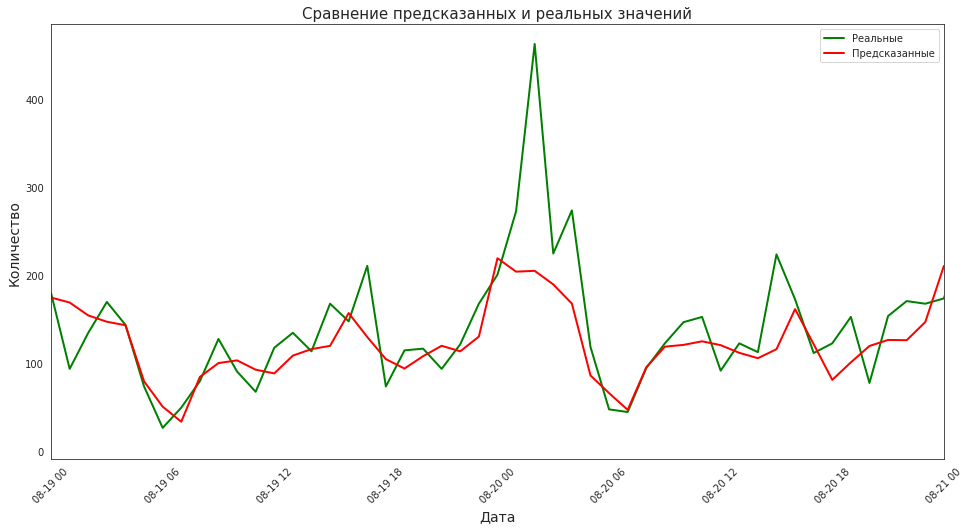

In [126]:
plt.subplots(figsize = (16,8))
predict = pd.Series(predict_test, index=target_test.index)

sns.lineplot(x=target_test.index, y=target_test.values, label='Реальные', color = 'g', linewidth = 2)
sns.lineplot(x=predict.index, y=predict.values, label='Предсказанные', color = 'r', linewidth = 2)
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Количество', fontsize = 14)
plt.title('Сравнение предсказанных и реальных значений', fontsize = 15);
plt.xlim(datetime(2018, 8, 19), datetime(2018, 8, 21))
plt.xticks(rotation=45);

### Предсказание заказов на следующий час

<div style="border:solid green 2.0px; padding: 10px"> 
На тестовой выборке лучше всего себя показала модель LGBMRegressor.
На ней предскажем количество заказов такси на следующий час
    
Для этого:
 - добавим в выборку одно наблюдение, соответствующее следующему часу
 - обучим модель на всей выборке (т.к. в данных используются данные часов, идущих непосредственно перед предсказанным значением), кроме одного нового наблюдения
<div>

In [127]:
model = LGBMRegressor(
    colsample_bytree = 0.8,
    learning_rate = 0.1,
    max_depth = 4,
    num_leaves = 30,
    objective = 'regression',
    subsample = 0.8
)

next_hour = data.index.max() + pd.to_timedelta(pd.Timedelta(hours=1))

features_train, target_train, features_test, target_test = make_features_and_split(
    data.append(pd.DataFrame(pd.Series(0, index =[next_hour]), columns=['num_orders'])), 
    max_lag = 2, 
    rolling_mean_size = 72, 
    test_size=1/(data.shape[0]+1))

model.fit(features_train, target_train)


predict_test = model.predict(features_test)
predict_test


array([228.84265801])

In [128]:
data.tail(10)

,num_orders
datetime,
2018-08-31 14:00:00,133
2018-08-31 15:00:00,116
2018-08-31 16:00:00,197
2018-08-31 17:00:00,217
2018-08-31 18:00:00,207
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159
2018-08-31 22:00:00,223


## Вывод

<div style="border:solid green 2.0px; padding: 10px"> 

В процессе проекта мы выяснили, для нашей задачи регрессии лучше всего подходит **LGBMRegressor**.

Модель удовлетворительно справляется с предсказанием колебпнии заказов от часа к часу, однако сглаживает сильные всплески и падения.
    
С ее помощью мы **предсказали значение заказов на следующий час: 229**
<div>